Goal: Code the electric field around a point charge

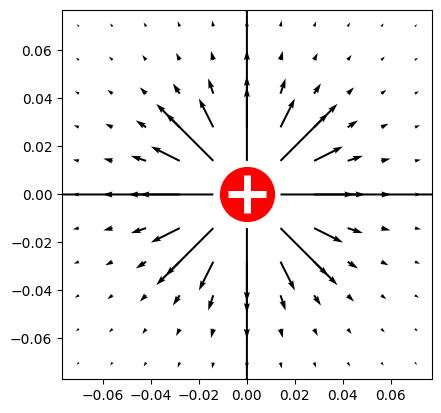

In [21]:
#single charge

import numpy as np
import matplotlib.pyplot as plt

# create the grid
xlist = np.linspace(-0.07, 0.07, 11)
ylist = np.linspace(-0.07, 0.07, 11)
X,Y = np.meshgrid(xlist,ylist)

# define u and v with the dimensions of X and Y, filled with zeroes
Ex = np.zeros(X.shape)
Ey = np.zeros(Y.shape)

k = 9E9 # Coulombs constant
q1 = [3E-9, 0, 0] # charge caharcteristics: charge, xpos, ypos

# Calculate the components of an electric field.
def PointEField(q, pos_q, pos_o):

    r = pos_o - pos_q # distance between the point and the charge
    rmag =  np.linalg.norm(r) # magnitude of the distance

    # If the distance is zero, we are the point charge
    # just don't return anything
    if rmag <= 0:
        return (0,0)

    rhat = r / rmag # create the unit vector

    # E = kq1/r^2
    Emag = k * q / (rmag ** 2)

    # calculate the x and y components 
    Ex = Emag * rhat[0]
    Ey = Emag * rhat[1]

    # Return the two components as the function's outputs.
    return Ex,Ey

# loop over every point and set its value
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Ex[i,j], Ey[i,j] = PointEField(q1[0], np.array(q1[1:]), np.array([X[i,j], Y[i,j]]))

# define the net Efield
u = Ex
v = Ey

# plot our graphs!
plt.quiver(X,Y,u,v)
plt.scatter([0], [0], [1500], color="red")
plt.scatter([0], [0], [750], color="white", marker="+", linewidths=5)
plt.axis('scaled')
plt.show()